In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

from matplotlib import pyplot as plt
%matplotlib inline

C:\Users\Aashish Ranjan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 26s 2us/step


(60000, 28, 28)


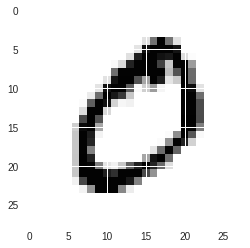

In [57]:
print(x_train.shape)
plt.imshow(x_train[1])

In [0]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [60]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train,10)
Y_test = np_utils.to_categorical(y_test,10)

In [62]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [222]:
model=Sequential()

model.add(Convolution2D(32, 7, 7, activation='relu', input_shape=(28,28,1)))
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Convolution2D(10, 11))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (7, 7), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [223]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_155 (Conv2D)          (None, 22, 22, 32)        1600      
_________________________________________________________________
dropout_14 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_156 (Conv2D)          (None, 11, 11, 10)        330       
_________________________________________________________________
dense_9 (Dense)              (None, 11, 11, 32)        352       
_________________________________________________________________
activation_50 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 11, 11, 32)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [226]:
model.fit(x_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Epoch 1/10
   96/60000 [..............................] - ETA: 1:17 - loss: 0.0064 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


60000/60000 [==============================] - 80s 1ms/step - loss: 0.0278 - acc: 0.9910
Epoch 2/10
 6016/60000 [==>...........................] - ETA: 1:11 - loss: 0.0194 - acc: 0.994860000/60000 [==============================] - 79s 1ms/step - loss: 0.0262 - acc: 0.9916
Epoch 3/10
 8832/60000 [===>..........................] - ETA: 1:07 - loss: 0.0205 - acc: 0.993360000/60000 [==============================] - 79s 1ms/step - loss: 0.0251 - acc: 0.9918
Epoch 4/10
10016/60000 [====>.........................] - ETA: 1:06 - loss: 0.0207 - acc: 0.993160000/60000 [==============================] - 79s 1ms/step - loss: 0.0232 - acc: 0.9920
Epoch 5/10
10432/60000 [====>.........................] - ETA: 1:05 - loss: 0.0213 - acc: 0.993560000/60000 [==============================] - 80s 1ms/step - loss: 0.0219 - acc: 0.9929
Epoch 6/10
10656/60000 [====>.........................] - ETA: 1:05 - loss: 0.0173 - acc: 0.994660000/60000 [==============================] - 79s 1ms/step - loss: 0.0223 

In [227]:
score = model.evaluate(x_test, Y_test, verbose=1)

10000/10000 [==============================] - 5s 543us/step


In [228]:
print(score)

[0.028313269265579585, 0.9913]


In [0]:
y_pred = model.predict(x_test)

In [27]:
print(y_pred[:9])
print(y_test[:9])

[[1.2418419e-36 2.4028171e-35 3.4933461e-27 2.4577850e-17 1.3857600e-37
  9.2194551e-33 0.0000000e+00 1.0000000e+00 3.5712058e-23 4.4651528e-23]
 [3.3882095e-17 9.4602371e-22 1.0000000e+00 1.3891009e-20 0.0000000e+00
  3.6626641e-31 7.9331626e-13 0.0000000e+00 1.6407045e-21 5.4664873e-28]
 [5.9166768e-15 1.0000000e+00 2.4026168e-11 7.0369833e-15 2.1581855e-08
  7.2592222e-16 1.4446831e-14 4.3870307e-12 7.8512852e-10 3.3099349e-18]
 [1.0000000e+00 4.5648019e-31 6.3314855e-16 5.7136371e-29 1.1419527e-31
  4.6015152e-24 4.5007492e-19 1.2984828e-22 1.9258911e-21 2.2022985e-22]
 [2.6393251e-24 5.9433160e-33 1.2130450e-24 8.8322180e-22 1.0000000e+00
  1.4702633e-29 9.9720945e-28 6.8775447e-21 1.4922639e-17 4.6175552e-15]
 [7.8535412e-19 1.0000000e+00 5.5497709e-15 2.8450507e-17 1.2016970e-08
  4.5165480e-22 2.2666968e-18 3.3071558e-08 2.0435618e-09 3.2187037e-17]
 [0.0000000e+00 3.3053126e-25 3.1040359e-17 3.0653444e-18 9.9984205e-01
  1.1625286e-18 8.3966425e-32 5.5569590e-17 1.5775239e-04 